In [1]:
#Uncomment to install the required libraries
# %pip install -r requirements.txt

In [1]:
# Import necessary libraries
from langchain_ollama import OllamaEmbeddings
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import time

# Step 1: Load the CSV file with ideas (source: https://www.kaggle.com/datasets/abdoomoh/gemini-api-competition)
df = pd.read_csv("dataset/preprocessed/preprocessed_data.csv")

print(f'There is a total of {sum(df['What it Does'].isna())} rows with NaNs')
df = df.dropna(subset=['What it Does'])
print(f'There is a total of {sum(df['What it Does'].isna())} rows with NaNs after removal!')

embedded_ideas = np.load('output/embedded_ideas.npy') # load

There is a total of 0 rows with NaNs
There is a total of 0 rows with NaNs after removal!


In [ ]:
# # Initialize OllamaEmbeddings model
# embeddings = OllamaEmbeddings(model="nomic-embed-text:latest")

# # Step 2: Embed each application idea
# ideas_list = df['brief_desc'][:].to_list()
# print(f'There are a total of {len(ideas_list)} ideas.')

# # Start timing the embedding process
# start_time = time.time()

# embedded_ideas = embeddings.embed_documents(ideas_list)

# # End timing the embedding process
# end_time = time.time()

# # Calculate and print the elapsed time
# elapsed_time = end_time - start_time
# print(f'Time taken to embed the ideas: {elapsed_time:.2f} seconds')

# embedded_ideas = np.asarray(embedded_ideas)
# print(embedded_ideas.shape)
# np.save('output/embedded_ideas.npy', embedded_ideas) # save

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
clusters = gmm.fit_predict(embedded_ideas)

# Step 7: Keep track of the original index of each idea
df['cluster'] = clusters  # Add cluster labels to the original dataframe

df['cluster'].value_counts(normalize=True)

cluster
0    0.555276
1    0.444724
Name: proportion, dtype: float64

In [12]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import plotly.io as pio

# Set the Plotly renderer for Jupyter
pio.renderers.default = 'browser'  # Change to 'browser' if you want it to open in a new tab

# Assuming df and embedded_ideas are already defined

try:
    # Step 1: Apply UMAP
    umap_model = umap.UMAP(n_components=3, random_state=42)
    embedded_umap = umap_model.fit_transform(embedded_ideas)

    # Step 2: Create a DataFrame for visualization
    df_umap = pd.DataFrame(embedded_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
    df_umap['cluster'] = df['cluster']

    # Step 3: Check for NaN values
    print(df_umap.isnull().sum())

    # Step 4: Drop rows with NaN values if any
    df_umap.dropna(inplace=True)

    # Step 5: Create an interactive 3D scatter plot using Plotly
    fig = px.scatter_3d(df_umap, 
                        x='UMAP1', 
                        y='UMAP2', 
                        z='UMAP3', 
                        color='cluster', 
                        title='UMAP Visualization of Clustered Ideas in 3D',
                        labels={'UMAP1': 'UMAP Component 1', 
                                'UMAP2': 'UMAP Component 2', 
                                'UMAP3': 'UMAP Component 3'},
                        color_continuous_scale='plasma')

    # Show the plot
    fig.show()

except Exception as e:
    print(f"An error occurred: {e}")

/Users/ode/Documents/1. Personal Projects/5. Gemini API Use Case Analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP1      0
UMAP2      0
UMAP3      0
cluster    0
dtype: int64


PCA1       0
PCA2       0
cluster    0
dtype: int64


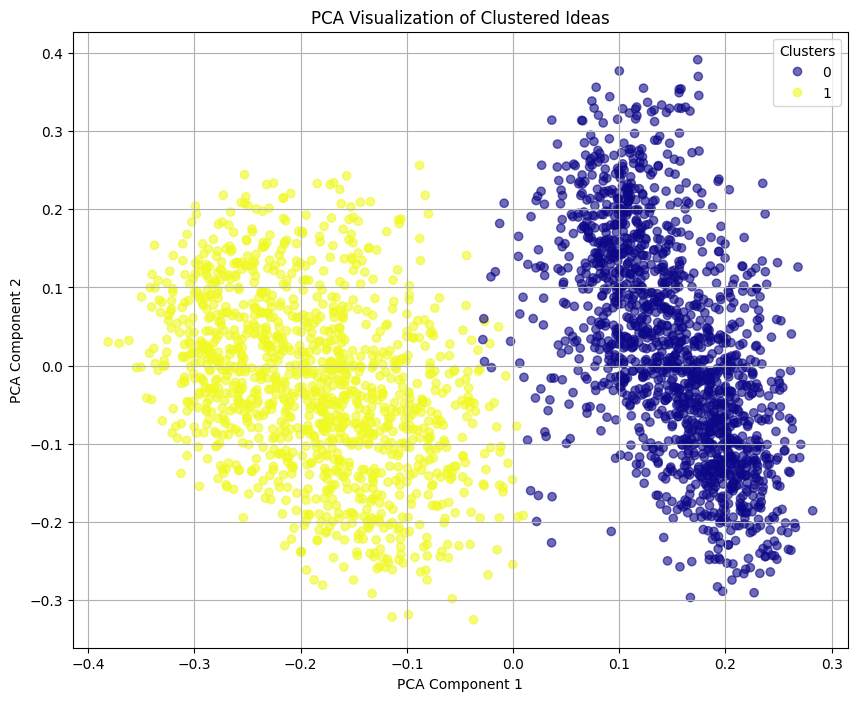

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df and embedded_ideas are already defined as in your code

# Step 1: Apply PCA
pca = PCA(n_components=2, random_state=42)
embedded_pca = pca.fit_transform(embedded_ideas)

# Step 2: Create a DataFrame for visualization
df_pca = pd.DataFrame(embedded_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']  # Include cluster labels

# Step 3: Check for NaN values
print(df_pca.isnull().sum())  # Check for NaNs in the DataFrame

# Step 4: Drop rows with NaN values if any
df_pca.dropna(inplace=True)

# Step 5: Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='plasma', alpha=0.6)

# Optional: Add a legend using the scatter plot's legend elements
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")

plt.title('PCA Visualization of Clustered Ideas')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

TSNE1      0
TSNE2      0
cluster    0
dtype: int64


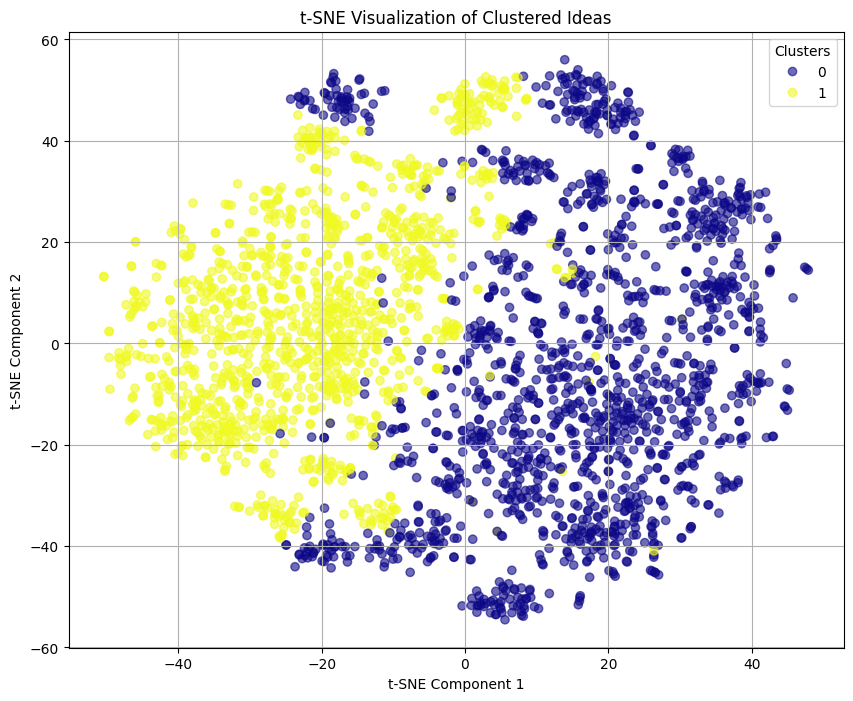

In [14]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Assuming df and embedded_ideas are already defined as in your code

# Step 1: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_tsne = tsne.fit_transform(embedded_ideas)

# Step 2: Create a DataFrame for visualization
df_tsne = pd.DataFrame(embedded_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df['cluster']  # Include cluster labels

# Step 3: Check for NaN values
print(df_tsne.isnull().sum())  # Check for NaNs in the DataFrame

# Step 4: Drop rows with NaN values if any
df_tsne.dropna(inplace=True)

# Step 5: Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='plasma', alpha=0.6)

# Optional: Add a legend using the scatter plot's legend elements
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")

plt.title('t-SNE Visualization of Clustered Ideas')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [17]:
col = ['Title', 'YouTube Link', 'brief_desc', 'Built With', 'By', 'Location', 'cluster']

# Save the clustered ideas to a new CSV
df[col].to_csv('output/clustered_gmm_gemini_api_app_ideas.csv', index=False)

In [18]:
sampled_df = df.groupby('cluster').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)

# Reset to default after printing
pd.options.display.max_colwidth = None

# View the result
display(sampled_df[['brief_desc', 'cluster']])

/var/folders/nn/h5fw3sbs6db8_j37mclxt8840000gn/T/ipykernel_47476/3802006234.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,brief_desc,cluster
0,"The application uses AI to summarize online information, generate personalized documents, and provide proactive insights based on user context and stored data.",0
1,"The application is a no-code platform that empowers creators to build AI-driven learning experiences, specifically for HR and education. It enables users to create multimedia content, personalize learning with AI tools, and share their creations through various platforms.",0
2,"The application uses Large Language Models (LLMs) to generate creative contents in a human-designed environment, combining basic rules and codes with human language understanding.",0
3,"The application provides personalized health, fitness, and nutrition insights through a web-based interface that leverages the Gemini API to deliver tailored content based on user queries and preferences.",1
4,"The application uses the Gemini API to identify food items in uploaded images, providing descriptive information and metadata about recognized objects. It involves image upload, processing, analysis, and response handling, with a focus on seamless user experience through error handling and presentation of results.",1
5,"The Educational Career Assistant Chatbot uses AI-powered Gemini API to provide personalized educational and career recommendations based on user inputs, offering interactive chat interface, curated suggestions, and a modern design with session capabilities for coherent responses.",1


Source: https://stats.stackexchange.com/questions/402668/intuitive-explanation-of-how-umap-works-compared-to-t-sne